# INF-616 - Tarefa 1

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

Alunos:
    Felipe Pereira
    Miguel Di Ciurcio Filho

## Classificação binária (decisão)

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline

In [2]:
dataset = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                    test_size=0.25,
                                                    random_state=42)

print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Gráfico exibindo as duas primeiras características do sub-conjunto de treino:


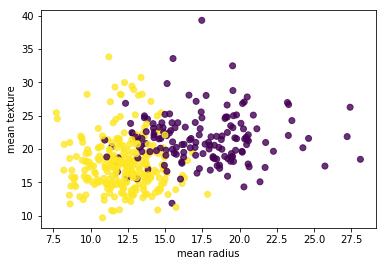

In [3]:
print('Gráfico exibindo as duas primeiras características do sub-conjunto de treino:')
_ = plt.scatter(x_train[:, 0], x_train[:, 1],
                c=y_train,
                alpha=0.8)
_ = plt.xlabel(dataset.feature_names[0])
_ = plt.ylabel(dataset.feature_names[1])

In [4]:
estimators = [SVC(random_state=13), LogisticRegression(random_state=24)]

for e in estimators:
    print('Treinando estimator', type(e).__name__)
    e.fit(x_train, y_train)

print('Todos os estimatores foram treinados!')

Treinando estimator SVC
Treinando estimator LogisticRegression
Todos os estimatores foram treinados!


### Qual dos dois estimadores apresenta menor taxa de erro sobre o conjunto WDBC teste?

In [5]:
#Criação de função para cálculo da Matriz de Confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusão normalizada')
    else:
        print('Matriz de confusão não normalizada')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

Teste do estimator SVC
exemplo de rótulos de treino verdadeiros: [1 0 1 0 0 0 1 0 1 1] ...
exemplo de rótulos de treino preditos: [1 0 1 0 0 0 1 0 1 1] ...
Matriz de confusão não normalizada
[[158   0]
 [  0 268]]
Teste do estimator LogisticRegression
exemplo de rótulos de treino verdadeiros: [1 0 1 0 0 0 1 0 1 1] ...
exemplo de rótulos de treino preditos: [1 0 1 0 0 0 1 0 1 1] ...
Matriz de confusão não normalizada
[[147  11]
 [  7 261]]


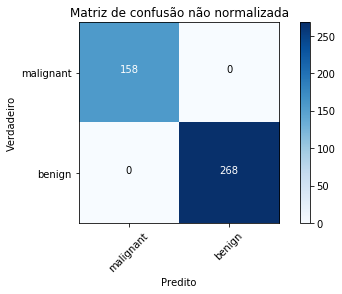

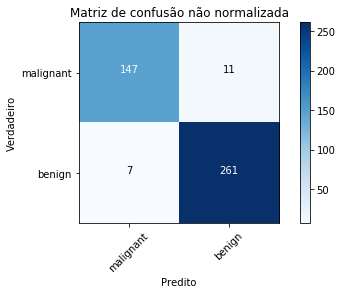

In [6]:
#Libs para a matriz de confusão - CONJUNTO DE TREINO
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

for e in estimators:
    print('Teste do estimator', type(e).__name__)
    p_train = e.predict(x_train)
    
    print('exemplo de rótulos de treino verdadeiros:', y_train[:10], '...')
    print('exemplo de rótulos de treino preditos:', p_train[:10], '...')
    
    cnf_matrix = confusion_matrix(y_train, p_train)
    np.set_printoptions(precision=2)
    
    plt.figure()
    #class_names = ['not_cancer' , 'cancer']
    class_names = dataset.target_names[:2]
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusão não normalizada')
    

- Algum dos estimatores super-especificou sobre o conjunto de treinamento?
    FP: Sim, o SVC
- Quantas vezes cada um dos estimadores errou, no conjunto de teste?
    FP: SVC possui 0 erros. Linear Regression possui 18 erros.

### Os estimadores conseguem distinguir ambas as classes de forma satisfatória?

Utilize uma ou mais funções vistas em aula para descobrir se os classificadores efetivamente conseguem distinguir amostras benignas de malignas.

In [7]:
#Bibliotecas para análise dos dados
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import interp

for e in estimators:
    print('Estimador', type(e).__name__)
    p_test = e.predict(x_test)
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test, p_test, target_names=class_names))

Estimador SVC
             precision    recall  f1-score   support

  malignant       0.00      0.00      0.00        54
     benign       0.62      1.00      0.77        89

avg / total       0.39      0.62      0.48       143

Estimador LogisticRegression
             precision    recall  f1-score   support

  malignant       0.96      0.93      0.94        54
     benign       0.96      0.98      0.97        89

avg / total       0.96      0.96      0.96       143



/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As pontuações mudam quando consideramos a frequência das classes? FP: Sim, principalmente para o SVC, que foi melhor no positivo do que no negativo. O LinearRegression foi mais parecido, com apenas pequenas diferenças de uma classe para outra. Os dados de Treino e Teste estavam igualmente balanceados, com cerca de 1 terço dos dados positivos. Esta diferença pode ter feito o SVC aprender melhor a classe engativa, que tinha 70% dos dados.

Teste do estimator SVC
exemplo de rótulos de treino verdadeiros: [1 0 0 1 1 0 0 0 1 1] ...
exemplo de rótulos de treino preditos: [1 1 1 1 1 1 1 1 1 1] ...
Matriz de confusão não normalizada
[[ 0 54]
 [ 0 89]]
Teste do estimator LogisticRegression
exemplo de rótulos de treino verdadeiros: [1 0 0 1 1 0 0 0 1 1] ...
exemplo de rótulos de treino preditos: [1 0 0 1 1 0 0 0 1 1] ...
Matriz de confusão não normalizada
[[50  4]
 [ 2 87]]


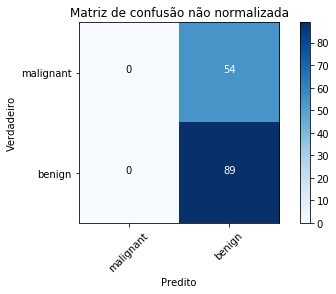

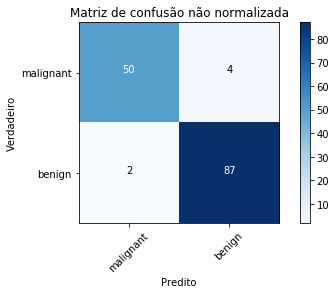

In [10]:
#Libs para a matriz de confusão - CONJUNTO DE TESTE
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

for e in estimators:
    print('Teste do estimator', type(e).__name__)
    p_test = e.predict(x_test)
    
    print('exemplo de rótulos de treino verdadeiros:', y_test[:10], '...')
    print('exemplo de rótulos de treino preditos:', p_test[:10], '...')
    
    cnf_matrix = confusion_matrix(y_test, p_test)
    np.set_printoptions(precision=2)
    
    plt.figure()
    #class_names = ['not_cancer' , 'cancer']
    class_names = dataset.target_names[:2]
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusão não normalizada')
    

### Apresente um relatório das principais métricas para ambos estimadores

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

for e in estimators:
    print('Estimador', type(e).__name__)
    
    p_test = e.predict(x_test)
    
    #Mean Absolute Error 
    print('MAE: {:.2f}'.format(mean_absolute_error(y_test , p_test)))

    #Mean Squared Error    
    print('MSE: {:.2f}'.format(mean_squared_error(y_test , p_test)))
    
    #Acuracia
    from sklearn.metrics import accuracy_score
    print('Acurácia normalizada = {:.2f}'.format(accuracy_score(y_test, p_test)))
    print('Acurácia = {:.0f}'.format(accuracy_score(y_test, p_test, normalize=False)))
    
    #AUC
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(y_test, p_test)
    print('AUC = {:.2f}'.format(auc(fpr, tpr)))
    
    #F1
    from sklearn.metrics import f1_score
    print('F1 = {:.2f}'.format(f1_score(y_test, p_test, average='binary')))
    
    #Espaço em branco
    print(' ')
    

Estimador SVC
MAE: 0.38
MSE: 0.38
Acurácia normalizada = 0.62
Acurácia = 89
AUC = 0.50
F1 = 0.77
 
Estimador LogisticRegression
MAE: 0.04
MSE: 0.04
Acurácia normalizada = 0.96
Acurácia = 137
AUC = 0.95
F1 = 0.97
 


Qual estimador possui melhor *f-1 score*?  FP: O LogisticRegression com 0.97, pois indica que possui melhor harmonia entre o precision e o recall, tornando o resultado do algoritmo melhor.
